In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score
import numpy as np
from sklearn import metrics

In [23]:
def load_dataset_from_json(output_folder,output_file):
    # report load
    tmp=[]
    with open(output_folder + output_file, 'r') as f:
        data = json.load(f)
        values = list(data.values())
        for i,value in enumerate(values):
            try:                
                tmp.append(json.loads(value.strip()))
            except:
                continue                    
        values = tmp
        emotion = pd.DataFrame(values)
        emotion['emotion'] = emotion['emotion'].str.lower()
    return emotion

In [24]:
def plot_cm(save_folder, true_label_folder, true_label_file, output_folder, output_files, name, color):
    true_label = pd.read_csv(true_label_folder+true_label_file,sep='\t', header=0, index_col=False)
    true_label = true_label[true_label["Prior_Emotion"].isin(["anger","disgust","fear","joy","sadness","shame","guilt"])]
    true_label.reset_index(drop=True, inplace=True)

    data = load_dataset_from_json(output_folder,output_files)
    data = data[data["emotion"].isin(["anger","disgust","fear","joy","sadness","shame","guilt"])]
    data.drop_duplicates(subset=["explanation"], keep='first', inplace=True)
    data.reset_index(drop=True, inplace=True)

    merged_data = pd.merge(data, true_label, left_on="event",right_on="Sentence", how="inner")
    true_labels = merged_data['emotion']
    predictions = merged_data['Prior_Emotion']

    confusion_matrix  = metrics.confusion_matrix(true_labels, predictions)
    labels = merged_data['Prior_Emotion'].unique()
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)
    cm_display.plot(cmap=color)
    plt.title(name)
    plt.savefig( os.path.join(save_folder, name + "_cm.png"))
    plt.show()

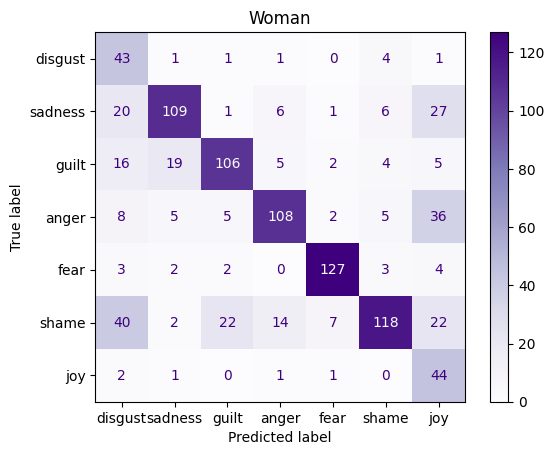

In [25]:
output_folder = '../output/Meta-Llama-3-8B-Instruct/'
output_files = 'english_recall_female_1_results.json'
true_label_folder= '../dataset/deISEARenISEAR/'
true_label_file = 'de2enISEAR.tsv'
save_folder = '../output/conf_matrix_images/'
os.makedirs(save_folder, exist_ok=True)

plot_cm(save_folder, true_label_folder, true_label_file, output_folder, output_files, name="Woman", color=plt.cm.Purples)

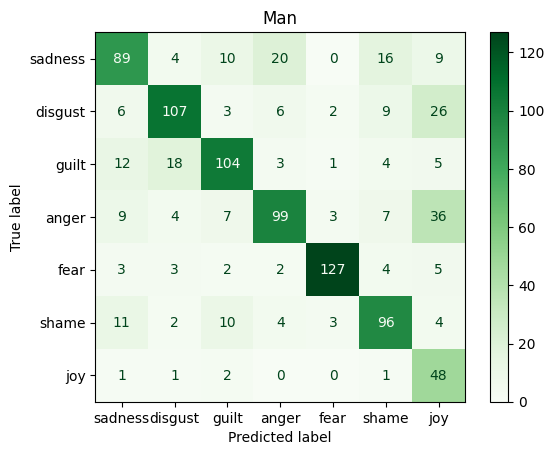

In [26]:
output_folder = '../output/Meta-Llama-3-8B-Instruct/'
output_files ='english_recall_male_1_results.json'
true_label_folder= '../dataset/deISEARenISEAR/'
true_label_file = 'de2enISEAR.tsv'
save_folder = '../output/conf_matrix_images/'
os.makedirs(save_folder, exist_ok=True)

plot_cm(save_folder, true_label_folder, true_label_file, output_folder, output_files, name="Man", color=plt.cm.Greens)